First 5 Rows of Dataset:
   survived  pclass     sex   age  sibsp  parch     fare embarked  class  \
0         0       3    male  22.0      1      0   7.2500        S  Third   
1         1       1  female  38.0      1      0  71.2833        C  First   
2         1       3  female  26.0      0      0   7.9250        S  Third   
3         1       1  female  35.0      1      0  53.1000        S  First   
4         0       3    male  35.0      0      0   8.0500        S  Third   

     who  adult_male deck  embark_town alive  alone  
0    man        True  NaN  Southampton    no  False  
1  woman       False    C    Cherbourg   yes  False  
2  woman       False  NaN  Southampton   yes   True  
3  woman       False    C  Southampton   yes  False  
4    man        True  NaN  Southampton    no   True  

Missing values in each column:
survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class     

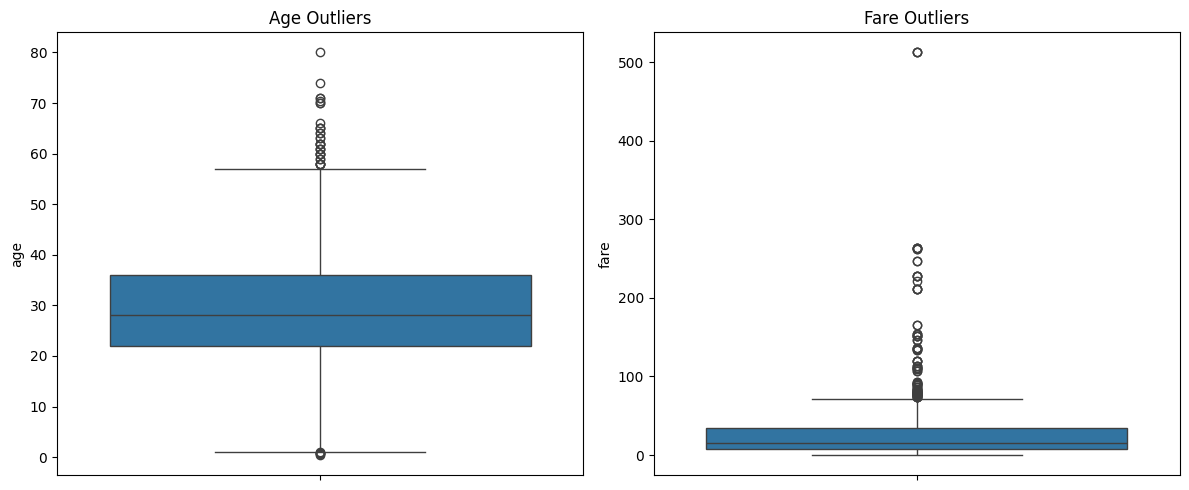

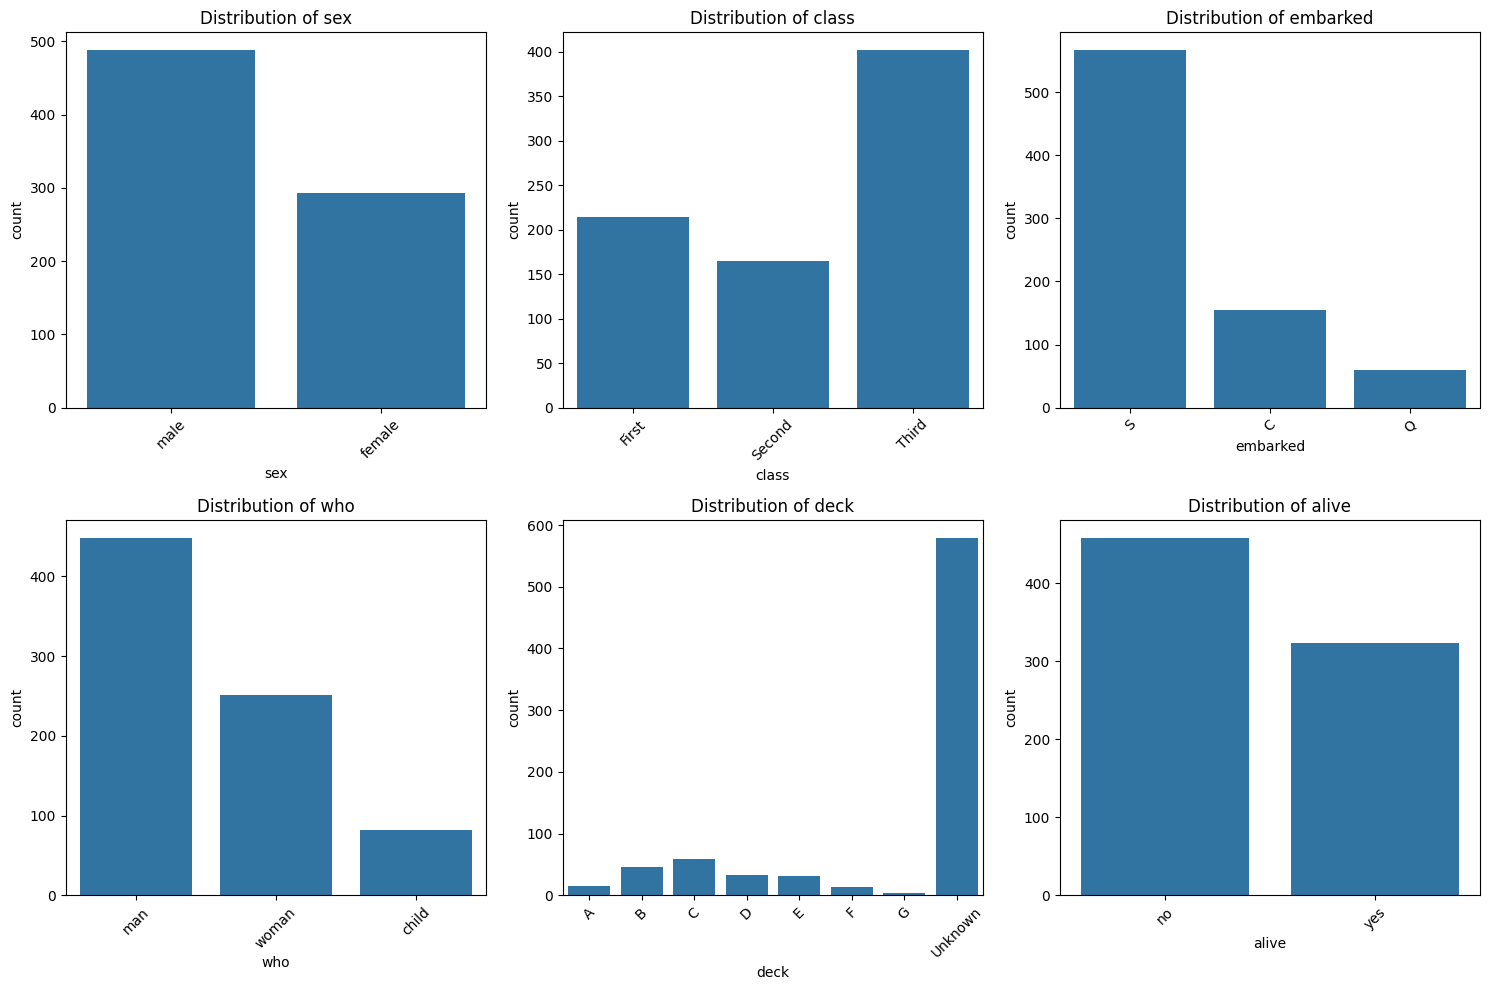

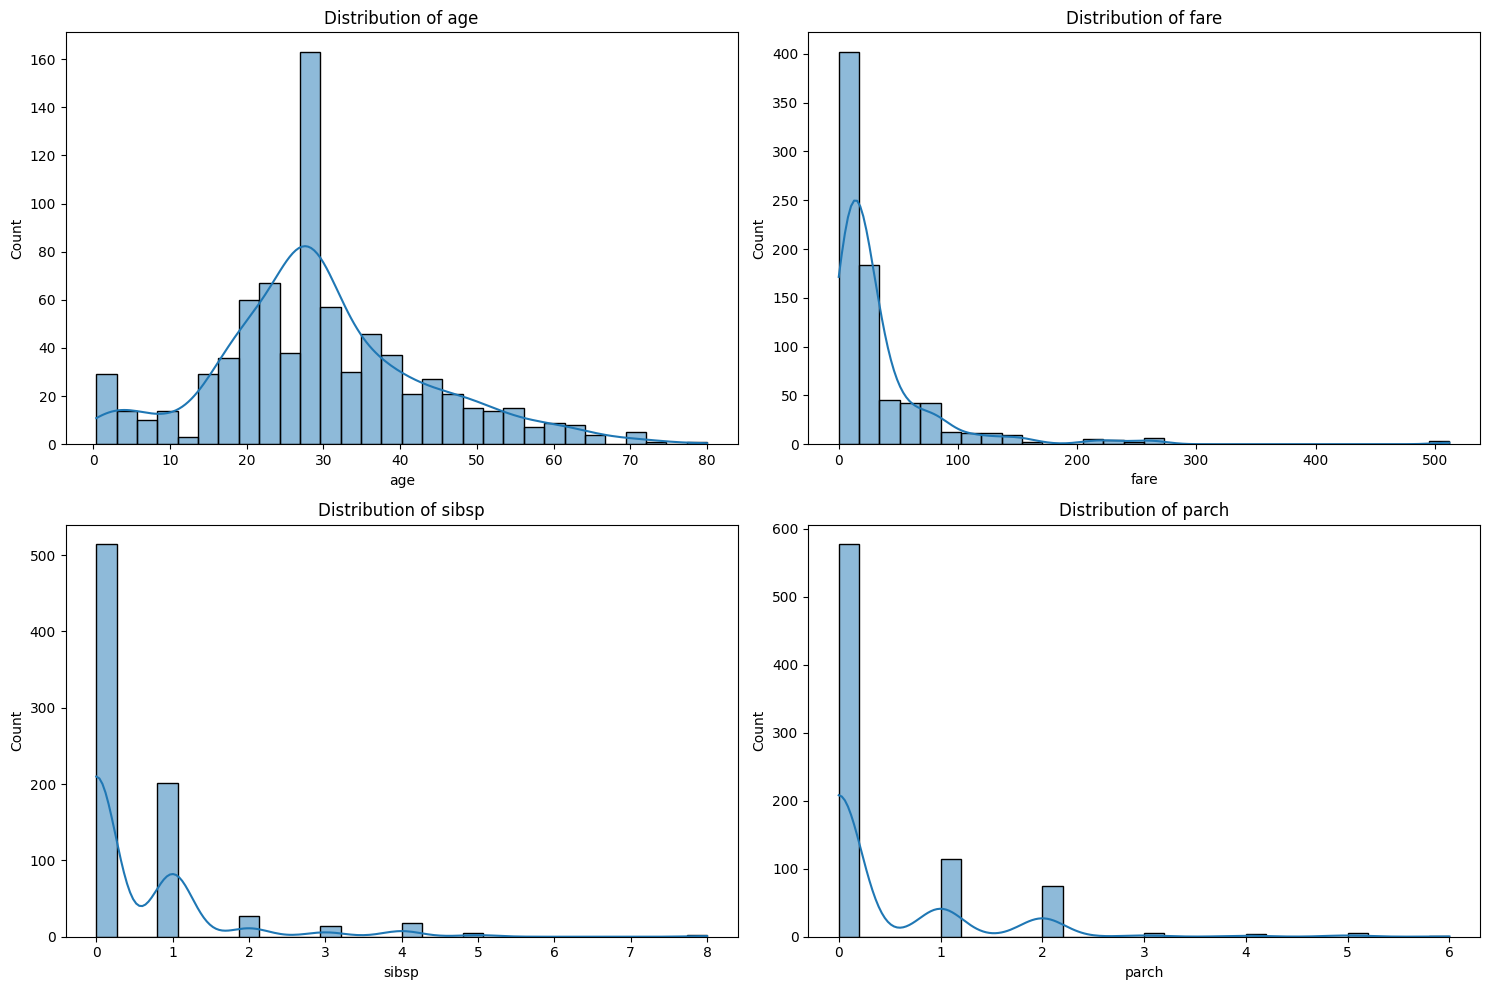

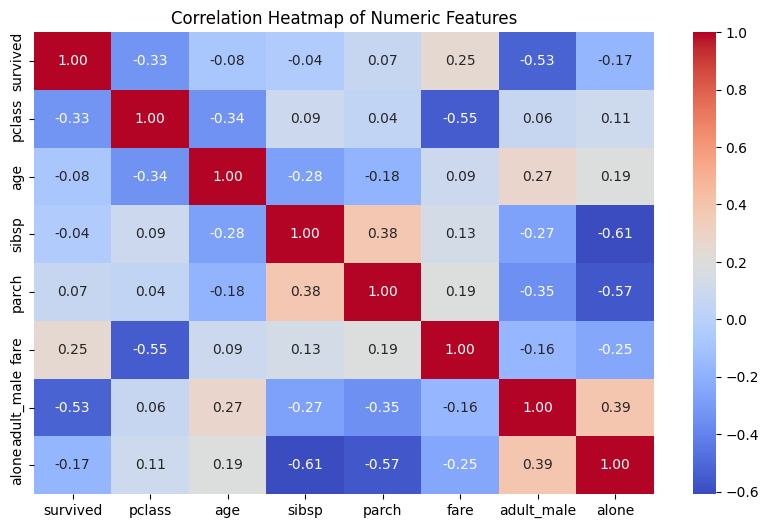


📌 Insights:
- Most passengers were in 3rd class and male.
- Higher survival rates observed among females and 1st class passengers.
- Missing 'age' values were filled with median age, and missing 'embarked' with most frequent port.
- 'Fare' shows some extreme outliers, suggesting a few very expensive tickets.
- 'Deck' data was largely missing, now filled with 'Unknown'.
- 'Age' follows a roughly right-skewed distribution, most passengers are young adults.
- 'Fare' distribution is highly skewed with a few extremely high values.


In [2]:
# Step 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Step 2: Load the Dataset
titanic = sns.load_dataset('titanic')
print("First 5 Rows of Dataset:")
print(titanic.head())

# Step 3: Data Cleaning

# Check missing values
print("\nMissing values in each column:")
print(titanic.isnull().sum())

# Handle missing values
titanic['age'] = titanic['age'].fillna(titanic['age'].median())
titanic['embarked'] = titanic['embarked'].fillna(titanic['embarked'].mode()[0])

# Handle deck missing values - categorical special handling
if 'Unknown' not in titanic['deck'].cat.categories:
    titanic['deck'] = titanic['deck'].cat.add_categories('Unknown')
titanic['deck'] = titanic['deck'].fillna('Unknown')

# Remove duplicates
print(f"\nShape before removing duplicates: {titanic.shape}")
titanic.drop_duplicates(inplace=True)
print(f"Shape after removing duplicates: {titanic.shape}")

# Step 4: Outlier Detection

# Visualize outliers in 'age' and 'fare'
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.boxplot(data=titanic, y='age')
plt.title('Age Outliers')

plt.subplot(1,2,2)
sns.boxplot(data=titanic, y='fare')
plt.title('Fare Outliers')

plt.tight_layout()
plt.show()

# Step 5: Visualizations

# Bar Charts for Categorical Variables
categorical_cols = ['sex', 'class', 'embarked', 'who', 'deck', 'alive']

plt.figure(figsize=(15,10))
for idx, col in enumerate(categorical_cols, 1):
    plt.subplot(2, 3, idx)
    sns.countplot(data=titanic, x=col)
    plt.title(f'Distribution of {col}')
    plt.xticks(rotation=45)

plt.tight_layout()
plt.show()

# Histograms for Numeric Variables
numeric_cols = ['age', 'fare', 'sibsp', 'parch']

plt.figure(figsize=(15,10))
for idx, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 2, idx)
    sns.histplot(titanic[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')

plt.tight_layout()
plt.show()

# Correlation Heatmap
plt.figure(figsize=(10,6))
sns.heatmap(titanic.corr(numeric_only=True), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap of Numeric Features')
plt.show()

# Step 6: Insights Summary

print("\n📌 Insights:")
print("- Most passengers were in 3rd class and male.")
print("- Higher survival rates observed among females and 1st class passengers.")
print("- Missing 'age' values were filled with median age, and missing 'embarked' with most frequent port.")
print("- 'Fare' shows some extreme outliers, suggesting a few very expensive tickets.")
print("- 'Deck' data was largely missing, now filled with 'Unknown'.")
print("- 'Age' follows a roughly right-skewed distribution, most passengers are young adults.")
print("- 'Fare' distribution is highly skewed with a few extremely high values.")
